# Homework 6: Logistic Regression

In this homework we will implement the Logistic Regression algorithm using Gradient Descent.

We use as reference the chapter 9 and 24 of Understanding Machine Learning.

Copy this notebook and insert the corresponding names on the file.


## Important!


1.   **You shall send this TP by mail with the subject: [HW6][Student_1][MICAS][Student_2][SI221]** (Adapt the subject accordingly to your specific situation).

2.   **This exercise can be done in pairs. Please, leave all of your answers on this notebook, which will be the only file you will have to deliver.**

3. **You have one week to deliver the homework.**

4. **Comment your code. If you leave an algorithm unfinished or you believe it may have a problem handling specific cases, we will consider this for evaluation.**

5. **We strongly encourage discussion between students as long as you own your solution. Copy pasting the solution from internet/colleagues will not be tolerated.**


**Send your solutions to both mails:**

<code>breno.skuk@gmail.com<br>
ibrahim.djemai@telecom-sudparis.eu</code>

(Feel free to send an email if you have any question concerning the TP)

**Good luck!**


# Part 1: From theory to algorithm
## Logistic Regression in a nutshell

Here we will take a look into the Logistic Regression algorithmic paradigm used for binary classification.

Moreover, the hypothesis class does not output the label directly, but it's maximum a posteriori likelihood (a value in the interval $[0,1]$).

This method can be "seen" either by the machine learning point of view as well as from the statistcal point of view.

<img src="https://studymachinelearning.com/wp-content/uploads/2019/09/sigmoid_graph.png" width=400/>

**Figure 1** : Sigmoid Function.

Let us define the logistic function $\sigma: \mathbb{R} → [0,1]$ (also known as sigmoid, see **Figure 1**) as follows:

$$\sigma(x) = \frac{e^{x}}{1+e^{x}} = \frac{1}{1+e^{-x}} = 1 - \sigma(-x) \tag{1}$$

Given a set of input data from $X \in \mathbb{R}^d$, and their corresponding labels from $Y \in \{0, 1\}$, the goal of Logistic Regression is to map the input $X$ via a Hypothesis function $\mathcal{h}_W$ with parameters $W$ to $Y$.

The hypothesis class $\mathcal{H}_W$ is defined as the set of functions parametrized by $W$:

$$\mathcal{H}_W = \{x \mapsto \sigma(\langle W, x \rangle ): W \in \mathbb{R}^d \}$$

such that for $\mathcal{h}_W \in \mathcal{H}_W$ we write

$$ \mathcal{h}_W:X \in \mathbb{R}^d → [0, 1]$$

$$\mathcal{h}_W(x) = \sigma(\langle W \cdot X \rangle)$$

Where $\sigma:x \in \mathbb{R} → [0, 1]$ is the **sigmoid** or the **logistic** function, as previously defined in $(1)$.


An interesting property of the $\sigma$ function that partly motivates its use is given by it's derivative, as expressed below:

\begin{align} \tag{2}
\sigma'(x) &= \frac{d}{dx} \frac{1}{1+e^{-x}} \\
&= \frac{-1}{(1+e^{-x})^2} (-e^{-x}) \\
&= \frac{1}{1+e^{-x}} \cdot \big(\frac{e^{-x}}{1+e^{-x}}\big)\\
&= \sigma(x) \cdot \sigma(-x)\\
&= \sigma(x) (1-\sigma(x))
\end{align}

## Prediction

Notice that the hypothesis class $\mathcal{H}_W$ does not contain functions that map the input to $\{0,1\}$, but instead to the interval $[0,1]$.

We will show in the following section the probabilistic interpretation of this hypothesis class, and motivate the following labeling rule:

$$
    y_{pred}=
\begin{cases} \tag{3}
    1 & \text{if } \mathcal{h}_W(x) \geq 0.5\\
    0,              & \text{otherwise}
\end{cases}
$$

Note in view of Figure 1 that when $\langle W \cdot X \rangle$ is very large then $\sigma(\langle W \cdot X \rangle)$ is close to 1, whereas if
$\langle W \cdot X \rangle$ is very small then $\sigma(\langle W \cdot X \rangle)$ is close to 0.

Remember that $\langle W \cdot X \rangle$ is was precisely the distance of $x$ to a hyperplane corresponding to $W$.
There is a resemblance on how we performed the prediction on the perceptron and SVM, where we based our analisys by studying  $sign(\langle W \cdot X \rangle)$.  

However, our halfpsace prediction was being performed with $\{-1,1\}$ labels whereas now we are working with $\{0,1\}$

## Probabilistic Model
Let $S^N = (x_i,y_i)_{i\in[N]} \overset{\mathrm{iid}}{\sim} (X,Y)^N$ be a training set with $N$ samples.

If we assume that:
$$ p(y_i = 1 | x_i, W) = \mathcal{h}_W(x_i) $$
$$ p(y_i = 0 | x_i, W) = 1 - \mathcal{h}_W(x_i) $$

We can write the equations above compactly as:

$$ p(y_i | x_i, W) = (\mathcal{h}_W(x_i))^{y_i} \cdot (1 - \mathcal{h}_W(x_i))^{1-y_i} \tag{4}$$

We can write the likelihood of the parameters as product of the likelihood for each point as follow (where we make use of the $\mathrm{iid}$ sampling):

\begin{align}
L(W) &= p(Y^N | X^N, W)\\
&= \prod^N_{i=1} p(y_i | x_i, W) \\
&= \prod^N_{i=1} (\mathcal{h}_W(x_i))^{y_i} \cdot (1 - \mathcal{h}_W(x_i))^{1-y_i} \\ \tag{5}
\end{align}

This is the well established statistical problem of finding a Maximum Likelihood Estimator, and we write the optimization as:

$$
W = arg \max_{W' \in \mathbb{R^d}} L(W') \tag{6}
$$


We can conviniently write an equivalent optimization problem by maximizing the log likelihood. This is possible because $log$ is a monotonically increasing function:

\begin{align} \tag{7}
\mathcal{L}(W) &= \log L(W) \\
&= \sum_{i=1}^{N} y_i \log(\mathcal{h}_W(x_i)) + (1-y_i) \log(1-\mathcal{h}_W(x_i))
\end{align}

The parameter $W$ is then given by:

$$
W = arg \max_{W' \in \mathbb{R^d}} \mathcal{L}(W')  \tag{8}
$$

To solve the maximization problem, we use **gradient ascent**. Written in vectorial notation, our updates will therefore be given by $W ← W + lr \cdot \nabla_W \mathcal{L}(W)$. (Note the positive rather than negative sign in the update formula, remember that we’re maximizing, rather than minimizing a function now)

With the change of representation of $x_i$ to facilitate the notation:
$W = [w_1, w_2, ..., w_j, ..., w_d], \quad x_i = [x_1^{(i)}, x_2^{(i)}, ..., x_j^{(i)}, ..., x_d^{(i)}]$

For any given sample, the gradient of the logistic loss function with respect to $W$ is given by :
$$\nabla \mathcal{L}(W) = \left[\frac{\partial \mathcal{L}(W)}{\partial w_1}, \cdots, \frac{\partial \mathcal{L}(W)}{\partial w_j}, \cdots, \frac{\partial \mathcal{L}(W)}{\partial w_d}\right] $$

The derivative of the likelihood with respect to a single coordinate can be easily obtained by using $(2)$ as:

$$ \frac{\partial}{\partial w_j} \mathcal{L}(W) = \frac{1}{N} \sum^N_{i=1}\left(y^{(i)}-\mathcal{h}_W(x^{(i)})\right) x_j^{(i)}$$

For each coordinate we have:

$$\nabla \mathcal{L}(W) = \frac{1}{N} \sum^N_{i=1} \left(y^{(i)}-h_W(x^{(i)})\right) \cdot\left[x_1^{(i)}, ..., x_j^{(i)}, ..., x_d^{(i)}\right] = \frac{1}{N} \sum^N_{i=1} \left(y^{(i)}-h_W(x^{(i)})\right) x^{(i)} $$

Finally, the gradient ascent step is given by:

$$ W^{(t+1)} ← W^{(t)} + lr \cdot \frac{1}{N} \sum^N_{i=1} \left(y_i-h_W(x_i)\right) x_i$$

## Question 1:
(a) In the deduction above we atack the problem of learning through data from the statistical point of view.

Usually, in machile learning we would choose a loss function $l_{logistic}$, write the Empirical Risk as the average value of the loss, and finally verify that for our $\mathcal{H}_W$,  $\mathcal{h}_W \in ERM_{h_W' \in \mathcal{H}_W} (\mathcal{L}(\mathcal{h}'_W))$ is minimizing the true Risk.

Can you spot the analogous to the loss function in $(7)$? Can this problem be made equivalent to a binary classification into $\{-1,1\}$?

(b) Discuss the similarities between linear regression and logistic regression. What types of problems are the most appropriate for them? Are they equivalent in some way?

**ANSWER (A):**

In equation (7), the function
\begin{align*}
\mathcal{L}(W) &= \sum_{i=1}^{N} y_i \log(\mathcal{h}W(x_i)) + (1-y_i) \log(1-\mathcal{h}W(x_i))
\end{align*}
is the log-likelihood. The negative of this function is commonly used in machine learning and is referred to as the cross-entropy loss. This loss function quantifies how well our predictions match the true labels. It can be written as:
\begin{align*}
l_{\text{logistic}}(W) &= -\sum_{i=1}^{N} y_i \log(\mathcal{h}_W(x_i)) + (1-y_i) \log(1-\mathcal{h}_W(x_i))
\end{align*}
The objective in a machine learning context would be to minimize this loss, which is equivalent to maximizing the log-likelihood in a statistical context.

Regarding the equivalence to binary classification into ${-1,1}$: Logistic regression outputs probabilities between $[0,1]$. By thresholding at 0.5, we get binary classification into ${0,1}$.


**ANSWER (B):**

Similarities:

Linear Assumption: Both models make linear assumptions about the relationship between the features and the outcome. For linear regression, the outcome is a continuous value, in other hand for logistic regression, it's the log odds of the binary outcome.
Parameters: Both methods use weight coefficients for each feature variable and a bias term.
Optimization: Both models use similar methods for finding the values of the parameters that minimize the cost, e.g., gradient descent.

Linear regression is used when we want to predict some continuous value. For example, how much money a movie will make based on its budget.

logistic regression is mainly for classification problems. for example, predict if a text message is spam or not. There are only two possibilities: spam or not spam. And logistic regression gives us a probability that a given input point belongs to a particular class.

The two algorithm involve linear relationships and they serve different purposes and produce different types of outputs. But there are some tricks to make logistic regression behave like linear regression and vice versa, but that's more complementary than equivalent.

## Question 2:
Fill out the code snippets below to implement the Logistic Regression and test its results

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Compute the logistic (also known as sigmoid) function

In [ ]:
def sigmoid(u):
  """
  Compute the sigmoid

  Parameters:
  -----------
  `u` : real number


  Returns:
  --------
  `sigma` : Computed sigma(u)

  """
  np.clip(u, -500, 500)
  return 1 / (1 + np.exp(-u))

### Compute the cost and its gradient using previously defined equations

In [ ]:
def getCost(W, X, Y):
  """
  Compute the cost

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]

  Returns:
  --------
  `J` : Computed cost

  """
  m = X.shape[1]
  h = sigmoid(np.dot(W.T, X))
  J = (-1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))

  return J


def getGradients(W, X, Y):
  """
  Compute the cost gradients

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]

  Returns:
  --------
  `dJ` : Computed gradients

  """
  m = X.shape[1]
  h = sigmoid(np.dot(W.T, X))
  dJ = (1/m) * np.dot(X, (h - Y).T)

  return dJ

### Perform a Gradient Descent Step

In [ ]:
def gradDescent(W, X, Y, lr):
  """
  Update the weights with gradient descent

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]
  `lr` : Learning Rate

  Returns:
  --------
  `W` : Updated weights [d x 1]

  """
  dJ = getGradients(W, X, Y)
  W = W - lr * dJ

  return W

### Logistic Regression functions for training and testing

In [ ]:
def add_bias(X):
    bias = np.ones((1, X.shape[1]))
    X_with_bias = np.vstack((bias, X))
    return X_with_bias

In [ ]:
def logRegTrain(X, Y, lr, maxEpochs=2500, minCostDiff=1e-4):
  """
  Train the Logistic Regression Model

  Parameters:
  -----------
  `X` : Training inputs [d x N]
  `Y` : Training Labels [1 x N]
  `lr` : Learning Rate
  `maxEpochs` : Maximum number of epochs before stopping the training
  `minCostDiff` : Minimum cost difference

  Returns:
  --------
  `W` : Trained weights [d x 1]

  """
  X = add_bias(X)
  # Randomly initialze the weights
  W = np.random.randn(X.shape[0], 1)

  costs = []
  epochCount = 0
  prevCost = 1e10
  converged = False # Boolean variable for convergence critereon

  while not converged:
    # Update the weights
    W = gradDescent(W, X, Y, lr)

    currCost = getCost(W, X, Y)
    costs.append(currCost)
    # Check if the convergence critereon is met
    if abs(prevCost - currCost) < minCostDiff:
      converged = True
    else:
      prevCost = currCost
    epochCount += 1
    if epochCount >= maxEpochs:
      break

  return W, costs

In [ ]:
def logResTest(W, X, Y):
  """
  Test the SVM Model

  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Testing inputs [d x N]
  `Y` : Testing Labels [1 x N]

  Returns:
  --------
  `A` : Accuracy
  `P` : Precision
  `R` : Recall

  """
  X = add_bias(X)
  Z = np.dot(W.T, X)
  A_pred = sigmoid(Z)

  predictions = np.where(A_pred > 0.5, 1, 0)

  TP = np.sum((predictions == 1) & (Y == 1))
  TN = np.sum((predictions == 0) & (Y == 0))
  FP = np.sum((predictions == 1) & (Y == 0))
  FN = np.sum((predictions == 0) & (Y == 1))

  A = (TP + TN) / float(TP + TN + FP + FN) #Accuracy

  if (TP + FP != 0):
    P = TP / float(TP + FP)
  else:
    P = 0

  if (TP + FN != 0):
    R = TP / float(TP + FN)
  else:
    R = 0
  return A, P, R

### Plot the data and the results
Functions for :

- Getting the decision boundry from the weights and plotting it with the data.

- Cost function evolution.

In [ ]:
def plotData(W, X, Y):
  """
  Plot the data alongside the decision boundary

  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Training and testing inputs [d x N]
  `Y` : Training and testing Labels [1 x N]

  """
  X = add_bias(X)
  plt.figure(figsize=(10, 6))

  # Plotting positive (label=1) and negative (label=0) examples
  plt.scatter(X[1, Y[0] == 1], X[2, Y[0] == 1], c='blue', label='Label 1')
  plt.scatter(X[1, Y[0] == 0], X[2, Y[0] == 0], c='red', label='Label 0')


  # Plotting the decision boundary
  x_values = np.linspace(min(X[1, :]), max(X[1, :]), 100)  # generating 100 points along x-axis
  y_values = - (W[0, 0] + W[1, 0] * x_values) / W[2, 0]     # getting corresponding y values from the decision boundary equation
  plt.plot(x_values, y_values, label='Decision Boundary', color='green')

  plt.xlabel('X-axis feature')
  plt.ylabel('Y-axis feature')
  plt.legend()
  plt.title('Data and Decision Boundary')
  plt.show()

def plotConvCurve(Js):
  """
  Plot the cost function evolution

  Parameters:
  -----------
  `Js` : Calculated costs at each epoch
  """
  plt.figure(figsize=(10, 6))

  plt.plot(Js, label='Cost Function', color='purple')

  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.legend()
  plt.title('Convergence Curve')
  plt.show()

In [ ]:
def plotDataWithoutBoundary(W, X, Y):
  """
  Plot the data alongside the decision boundary

  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Training and testing inputs [d x N]
  `Y` : Training and testing Labels [1 x N]

  """
  X = add_bias(X)
  plt.figure(figsize=(10, 6))

  # Plotting positive (label=1) and negative (label=0) examples
  plt.scatter(X[1, Y[0] == 1], X[2, Y[0] == 1], c='blue', label='Label 1')
  plt.scatter(X[1, Y[0] == 0], X[2, Y[0] == 0], c='red', label='Label 0')

  plt.xlabel('X-axis feature')
  plt.ylabel('Y-axis feature')
  plt.legend()
  plt.title('Data')
  plt.show()

### Synthetic Data generation :
Consider a data set $\{x(n), d(n)\}^{200}_{n=1}$ consisting of $200$ points $x(n) = (x_1(n), x_2(n))$ and
their corresponding labels $d(n)$, such that the first $100$ points have label $d(n) = 1$ and
are generated according to a Gaussian distribution $x(n) ∼ \mathcal{N} ([1, 0] , \sigma^2
I)$, and such that
the other $100$ points have label $d(n) = 0$ and are generated according to a Gaussian
distribution $x(n) ∼ \mathcal{N} ([0, -1] , \sigma^2
I)$.

In [ ]:
def genData(meanPos, meanNeg, sigma, N):
  """
  Generate synthetic data following the gaussian distribution

  Parameters:
  -----------
  `meanPos` : Mean for the Data with label d(n) = 1 [1 x 2]
  `meanNeg` : Mean for the Data with label d(n) = 0 [1 x 2]
  `sigmas` :  Standard deviation

  Returns:
  --------
  `X` : Input Data
  `Y` : Labels

  """
  covariance = sigma**2 * np.identity(2)

  pos_samples = np.random.multivariate_normal(meanPos, covariance, N//2).T
  pos_labels = np.ones((1, N//2))

  neg_samples = np.random.multivariate_normal(meanNeg, covariance, N//2).T
  neg_labels = np.zeros((1, N//2))

  X = np.hstack((pos_samples, neg_samples))
  Y = np.hstack((pos_labels, neg_labels))

  return X, Y

### Putting everything together
- Plot the data

- Train the Logistic Regression Model using variance $\sigma^2 = 0.25$ and $\sigma^2 = 0.05$

- Plot the convergence curve

- Plot the data with the decision boundary

- Test the Logistic Regression Model and show the accuracy, precision and recall figures

- Compare the results with the previsouly implemented Perceptron and SVM. Comment the results.

In [ ]:
def main(lr):
  """
  Main function for training and testing the SVM

  Parameters:
  -----------
  `lr` : Learning Rate

  """
  meanPos = [1, 0]
  meanNeg = [0, -1]
  N = 200

  sigma_1 = 0.5  # Square root of variance for first case
  X1, Y1 = genData(meanPos, meanNeg, sigma_1, N)

  sigma_2 = np.sqrt(0.05)  # Square root of variance for second case
  X2, Y2 = genData(meanPos, meanNeg, sigma_2, N)

  W1, costs1 = logRegTrain(X1, Y1, lr)
  W2, costs2 = logRegTrain(X2, Y2, lr)

  plotDataWithoutBoundary(W1, X1, Y1)
  plotDataWithoutBoundary(W2, X2, Y2)

  plotConvCurve(costs1)
  plotConvCurve(costs2)

  plotData(W1, X1, Y1)
  plotData(W2, X2, Y2)

  A1, P1, R1 = logResTest(W1, X1, Y1)
  A2, P2, R2 = logResTest(W2, X2, Y2)
  print(f"Results for σ^2 = 0.25: Accuracy: {A1}, Precision: {P1}, Recall: {R1}")
  print(f"Results for σ^2 = 0.05: Accuracy: {A2}, Precision: {P2}, Recall: {R2}")

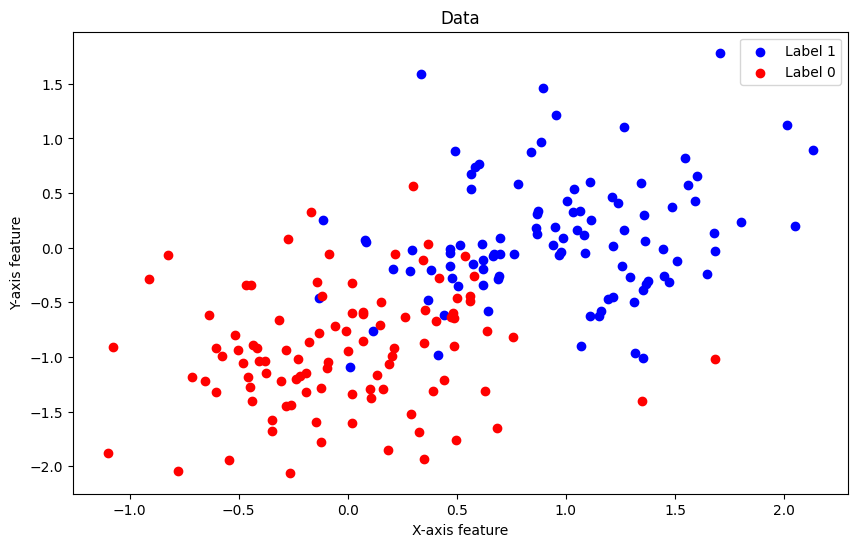

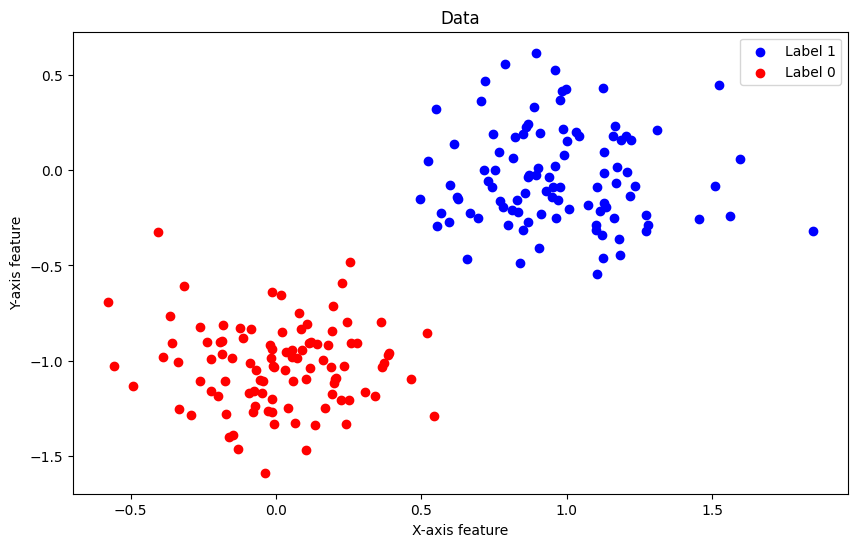

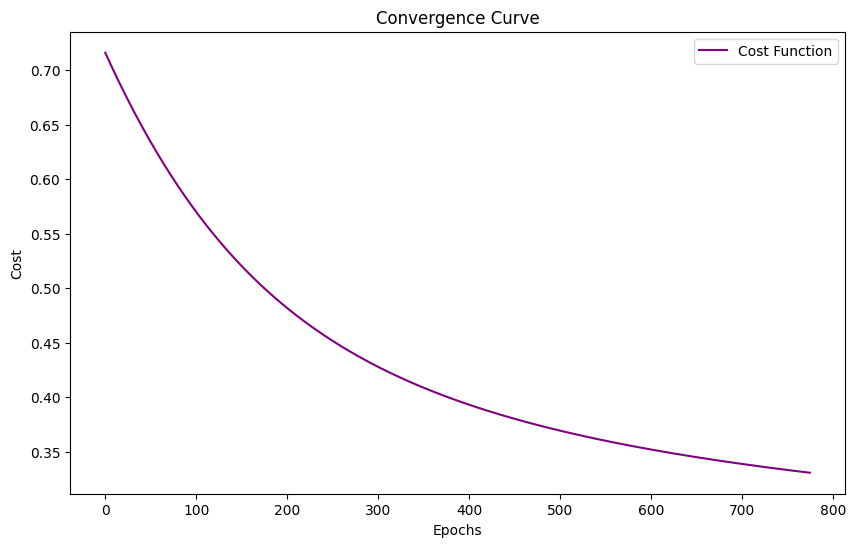

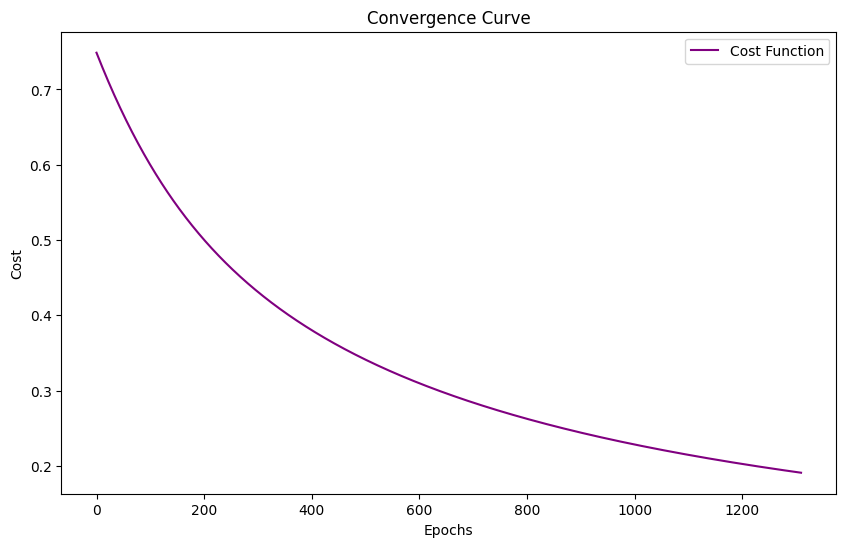

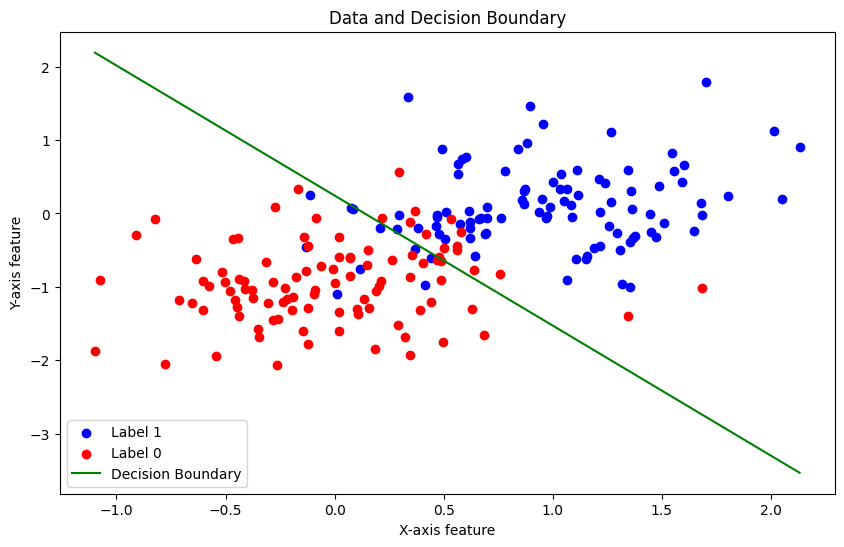

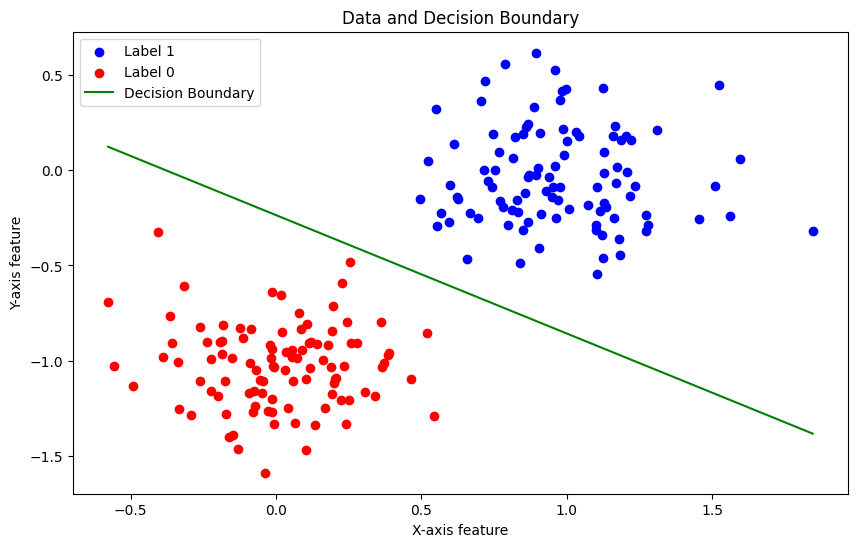

Results for σ^2 = 0.25: Accuracy: 0.875, Precision: 0.8571428571428571, Recall: 0.9
Results for σ^2 = 0.05: Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [ ]:
# Your Hyperparameters
lr = 0.01
main(lr)

# Part 2: Dealing with categorical data

A categorical variable can take on values on a finite set of fixed possible values. Samples from categorical assign each element to a particular group or nominal category on the basis of some qualitative property.

## Question 3:

Here you will predict the survival score of a passenger of the titanic disaster.

You will choose the prediciton variables $x$ from the available options and apply logistic regression on it to regress the 'survival' variable.

Here we have two types of variables: Numerical and categorical. For instance, the passenger Age can be an integer $\in [0, 120]$. The passenger class, on the other hand, can only be represented by $3$ values. The passenger sex by $2$ values.


Below are the functions that donwload and preprocess the data.


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

gdd.download_file_from_google_drive(file_id='1zilQH06ud0nzmmqLUwCnwDHdJkNICBU4',
                                    dest_path='./titanic/data.zip',
                                    unzip=True)
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

# preprocess data

train.drop("Cabin",inplace=True,axis=1)
test.drop("Cabin",inplace=True,axis=1)

train = train[train['Age'].notna()]
test = test[test['Age'].notna()]


train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [ ]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [ ]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q


Categorical Values:

Training data shape:  (714, 11)


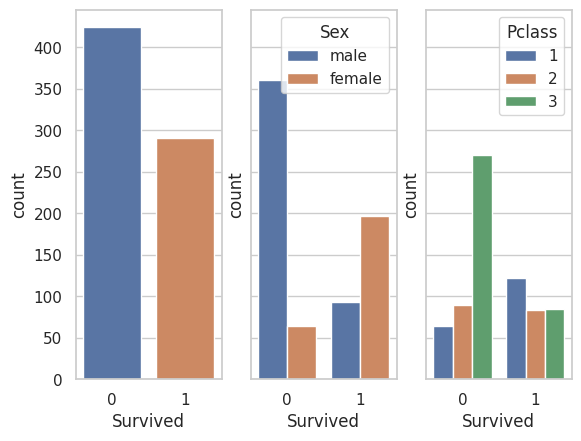

In [ ]:
print('Training data shape: ', train.shape)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.countplot(x = 'Survived',data = train, ax = ax1)
sns.countplot(x = 'Survived',hue = 'Sex',data = train, ax = ax2)
sns.countplot(x = 'Survived',hue = 'Pclass',data = train, ax = ax3)

plt.show()

**Up to you**

Apply logistic regression on the training data to predict if a passenger survived or not given the variables of your choosing. A possible approach is to encode the categorical variables in an appropriate way such that logistic regression can be applied.

Justify your choices and validate your results using the validation dataset of your choosing.

Please, don't "waste" time finetuning your model, this is not a competition. Always remember that we just want to evaluate your understanding of the problem and theory.

**Optional**: If you want to compete, you can check the result of your model test prediction on the following kaggle challenge:

https://www.kaggle.com/c/titanic/data

You have to export the data on the corresponding data format.

In [ ]:
#Training set
x_train = train['Age'].to_numpy().reshape(-1,1)
y_train = train['Survived'].to_numpy().reshape(-1,1)

#Validation set
x_val = train['Age'].to_numpy().reshape(-1,1)
y_val = train['Survived'].to_numpy().reshape(-1,1)

# Test set
x_test = test['Age'].to_numpy().reshape(-1,1)



In [ ]:
# Train the logistic regression model
weights, costs = logRegTrain(x_train.T, y_train.T, lr=0.01)

# Predict on training, validation, and test sets
y_pred_train = sigmoid(np.dot(add_bias(x_train.T).T, weights)) > 0.5
y_pred_val = sigmoid(np.dot(add_bias(x_val.T).T, weights)) > 0.5
y_pred_test = sigmoid(np.dot(add_bias(x_test.T).T, weights)) > 0.5

<ipython-input-3-4a461810f711>:18: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))
<ipython-input-3-4a461810f711>:18: RuntimeWarning: invalid value encountered in multiply
  J = (-1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))


Print the Confusion matrix of your prediction

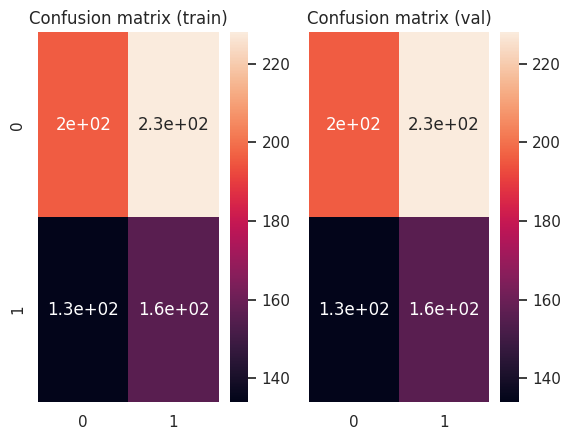

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Get the confusion matrix
cf_matrix_test = confusion_matrix(y_val, y_pred_val)

# Plot with sns

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.heatmap(cf_matrix_train, annot=True, ax = ax1).set(title='Confusion matrix (train)')
sns.heatmap(cf_matrix_test, annot=True, ax = ax2).set(title='Confusion matrix (val)')


plt.show()

# Part 3: Linear Regression for Housing Prices prediction

Linear regression is a common statistical tool for modeling the relationship between some “explanatory” variables and some real valued outcome.

The hypothesis class of linear regression predictors is simply the set of linear
functions:

The hypothesis class $\mathcal{H}_W$ is defined as the set of functions parametrized by $W$:

$$\mathcal{H}_W = \{x \mapsto \langle W, x \rangle : W \in \mathbb{R}^d \}$$

A common loss function is the squared loss:

$$
l_{mse}(h,(x, y)) = (h(x) − y)^2
$$

The corresponding empirical risk function is called the Mean Squared
Error, namely,

$$\mathcal{L}_S(h) = \frac{1}{N} \sum^N_{i=1}(h(x_i) - y_i)^2
$$

The problem above is convex and in fact has closed form solution, easily obtained by taking the gradient w.r.p. to $W$ and equaling to zero.

Let $X$ be defined as the $N \times d$ matrix where each row corresponds to sample $x^{(i)}$ and each column corresponds to the dimension $j$. Namely, $X_{ij}$ corresponds to feature $j$ of sample $i$:

$$
X = \begin{bmatrix} x^{(1)}_1 & x^{(1)}_2 & \dots & x^{(1)}_d \\ x^{(2)}_1 & x^{(2)}_2 & \dots & x^{(2)}_d \\ x^{(3)}_1 & x^{(3)}_2 & \dots & x^{(3)}_d \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ x^{(N)}_1 & x^{(N)}_2 & \dots & x^{(N)}_d \\ \end{bmatrix}
$$

And $Y$ be a $N \times 1$ column vector where each row corresponds to the ground truth label.

$$Y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
y^{(3)} \\
\vdots \\
y^{(N)} \\
\end{bmatrix}$$

Then, the closed form solution of the MSE problem is given by:

$$W^* = (X^T \times X)^{-1}\times X^T \times Y$$

It is also possible to add a regularization term to the MSE penalization loss that also have efficient solutions.

* Ridge regression: If we add the L2 norm penalization ($\lambda ||W||_2$) we obtain the famous Ridge regression which has close form solution as the penalty is also convex on $W$.

* Lasso regression: If we add the L1 norm penalization ($\lambda ||W||_1$) we obtain Lasso regression, which typically requires iterative methods like coordinate descent as the problems is not convex.

* Elastic Net: If we add a combination of both the L2 and L1 norm penalization ($\lambda_2 ||W||_2 + \lambda_1 ||W||_1$) we obtain Elastic Net regression, a hybrid method that combines L1 and L2 regularization, offering a balance between Lasso and Ridge.

Here you will use linear regression as offered by sklearn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Data is found in the Kaggle website : https://www.kaggle.com/datasets/vedavyasv/usa-housing

## Question 4:
- Load the data
- Remove the last column (address)
- Plot the correlation matrix for the data, in order to see how the variables are correlated with each other. Comment the result.
- Split the data into a training set and a test set (75/25)
- Predict the price of houses with linear regression model.
- Compute the mean absolute error of the test set.
- Plot the actual price of the test data set versus its prediction. Comment the results.



In [ ]:
from google.colab import files
import os
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vedavyasv/usa-housing
!unzip usa-housing.zip

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
usa-housing.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  usa-housing.zip
replace USA_Housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: USA_Housing.csv         


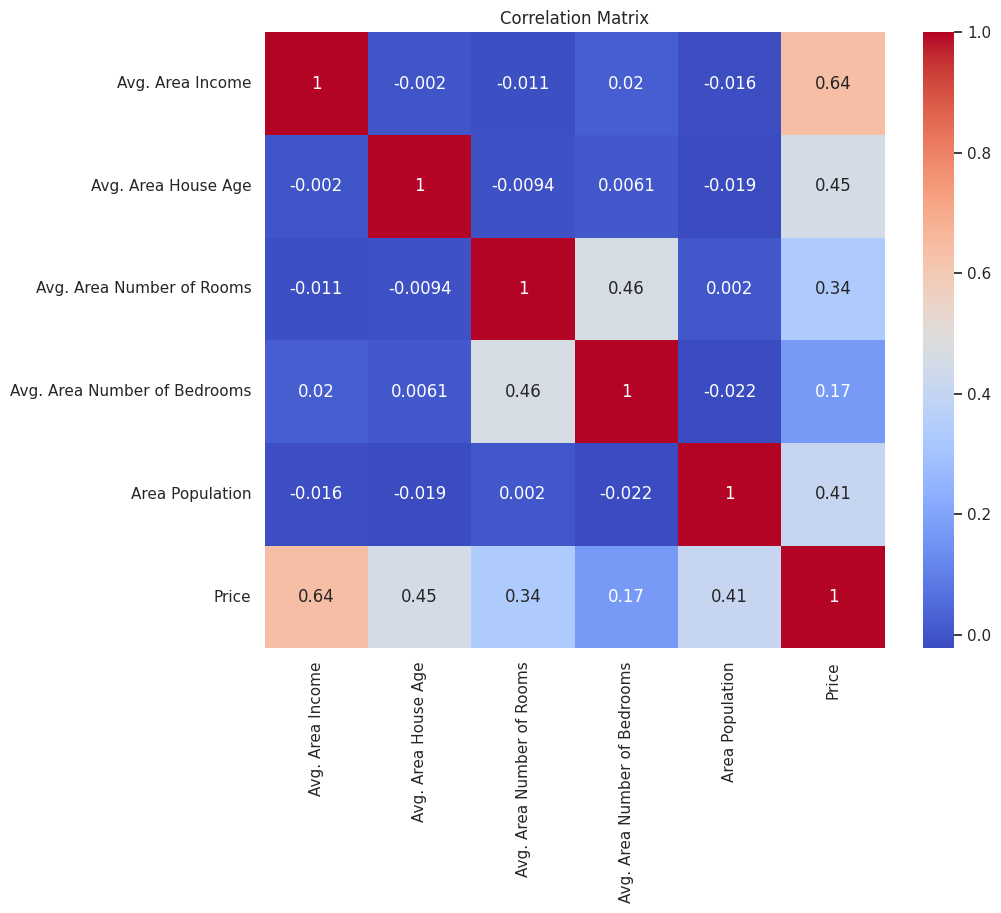

In [ ]:
# Section 1: Download and process the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


data = pd.read_csv('USA_Housing.csv')

data.drop('Address', axis=1, inplace=True)

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
def main():
    X = data.drop('Price', axis=1)
    y = data['Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error: ${mae:,.2f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs. Predicted Price')
    plt.show()

Mean Absolute Error: $80,859.63


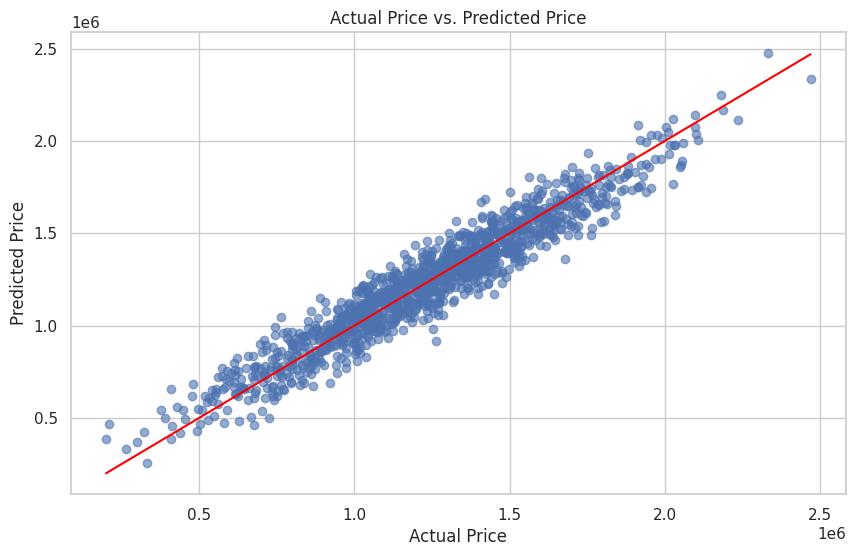

In [ ]:
main()

## References :
- Chapter 9 of the book : Understanding Machine Learning


# Comments of the students:

To improve the experience of students that will take the course on the future any thoughtful comment or suggestion will be much appreciated!

**Comments:**